In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [ ]:
pd.set_option('display.max_rows', 200000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True)

In [ ]:
from google.colab import files
files.upload()

Saving Test_0qrQsBZ.csv to Test_0qrQsBZ.csv


{'Test_0qrQsBZ.csv': b'ID,Datetime\r\n18288,26-09-2014 00:00\r\n18289,26-09-2014 01:00\r\n18290,26-09-2014 02:00\r\n18291,26-09-2014 03:00\r\n18292,26-09-2014 04:00\r\n18293,26-09-2014 05:00\r\n18294,26-09-2014 06:00\r\n18295,26-09-2014 07:00\r\n18296,26-09-2014 08:00\r\n18297,26-09-2014 09:00\r\n18298,26-09-2014 10:00\r\n18299,26-09-2014 11:00\r\n18300,26-09-2014 12:00\r\n18301,26-09-2014 13:00\r\n18302,26-09-2014 14:00\r\n18303,26-09-2014 15:00\r\n18304,26-09-2014 16:00\r\n18305,26-09-2014 17:00\r\n18306,26-09-2014 18:00\r\n18307,26-09-2014 19:00\r\n18308,26-09-2014 20:00\r\n18309,26-09-2014 21:00\r\n18310,26-09-2014 22:00\r\n18311,26-09-2014 23:00\r\n18312,27-09-2014 00:00\r\n18313,27-09-2014 01:00\r\n18314,27-09-2014 02:00\r\n18315,27-09-2014 03:00\r\n18316,27-09-2014 04:00\r\n18317,27-09-2014 05:00\r\n18318,27-09-2014 06:00\r\n18319,27-09-2014 07:00\r\n18320,27-09-2014 08:00\r\n18321,27-09-2014 09:00\r\n18322,27-09-2014 10:00\r\n18323,27-09-2014 11:00\r\n18324,27-09-2014 12:00\r\n

In [ ]:
train=pd.read_csv('Train_SU63ISt.csv')

In [ ]:
test=pd.read_csv('Test_0qrQsBZ.csv')

In [ ]:
train.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [ ]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


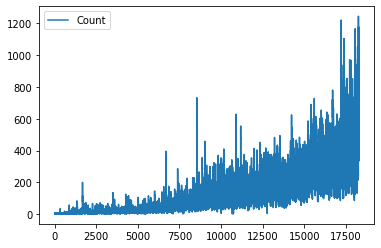

In [ ]:
train[['Datetime','Count']].plot()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [ ]:
train=train.drop('ID', axis=1)

In [ ]:
train['Datetime']=pd.to_datetime(train['Datetime'])
test['Datetime']=pd.to_datetime(test['Datetime'])

In [ ]:
train.columns=["ds","y"]

In [ ]:
from fbprophet import Prophet

In [ ]:
model=Prophet(n_changepoints=120, changepoint_range=0.15)
model.fit(train)

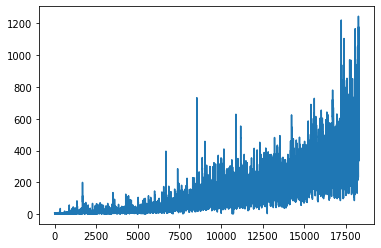

In [ ]:
train['y'].plot()

In [ ]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0}),
             ('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0}),
             ('daily',
              {'condition_name': None,
               'fourier_order': 4,
               'mode': 'additive',
               'period': 1,
               'prior_scale': 10.0})])

In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates.shape

(18653, 1)

In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-09 00:00:00,-13.394725,-102.204433,131.694224,-13.394725,-13.394725,27.518130,27.518130,27.518130,5.296177,5.296177,5.296177,-14.473132,-14.473132,-14.473132,36.695085,36.695085,36.695085,0.0,0.0,0.0,14.123406
1,2012-01-09 01:00:00,-13.388795,-119.238979,106.275089,-13.388795,-13.388795,6.729254,6.729254,6.729254,-17.176304,-17.176304,-17.176304,-12.736432,-12.736432,-12.736432,36.641990,36.641990,36.641990,0.0,0.0,0.0,-6.659541
2,2012-01-09 02:00:00,-13.382864,-145.279048,82.134599,-13.382864,-13.382864,-14.158305,-14.158305,-14.158305,-39.775626,-39.775626,-39.775626,-10.971123,-10.971123,-10.971123,36.588444,36.588444,36.588444,0.0,0.0,0.0,-27.541169
3,2012-01-09 03:00:00,-13.376934,-165.341154,70.671341,-13.376934,-13.376934,-29.945111,-29.945111,-29.945111,-57.294154,-57.294154,-57.294154,-9.185409,-9.185409,-9.185409,36.534451,36.534451,36.534451,0.0,0.0,0.0,-43.322046
4,2012-01-09 04:00:00,-13.371004,-165.944849,63.648329,-13.371004,-13.371004,-39.290003,-39.290003,-39.290003,-68.382415,-68.382415,-68.382415,-7.387601,-7.387601,-7.387601,36.480014,36.480014,36.480014,0.0,0.0,0.0,-52.661007


In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2012-01-09 00:00:00,14.123406,-102.204433,131.694224
1,2012-01-09 01:00:00,-6.659541,-119.238979,106.275089
2,2012-01-09 02:00:00,-27.541169,-145.279048,82.134599
3,2012-01-09 03:00:00,-43.322046,-165.341154,70.671341
4,2012-01-09 04:00:00,-52.661007,-165.944849,63.648329


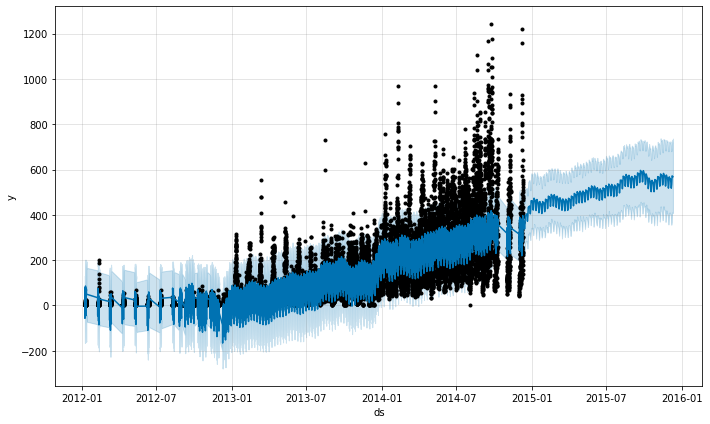

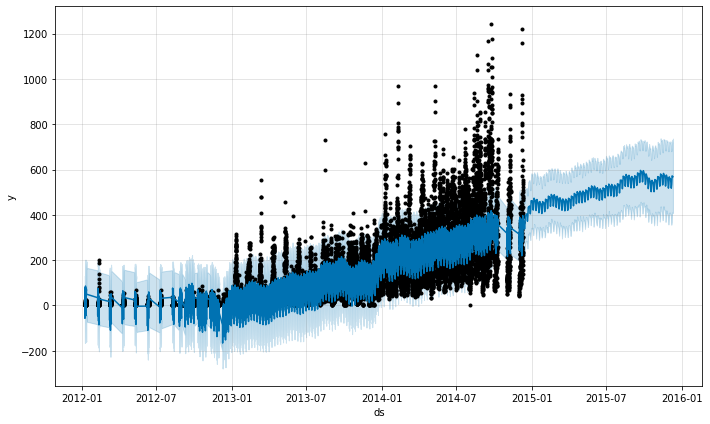

In [ ]:
#### plot the predicted projection
model.plot(prediction)

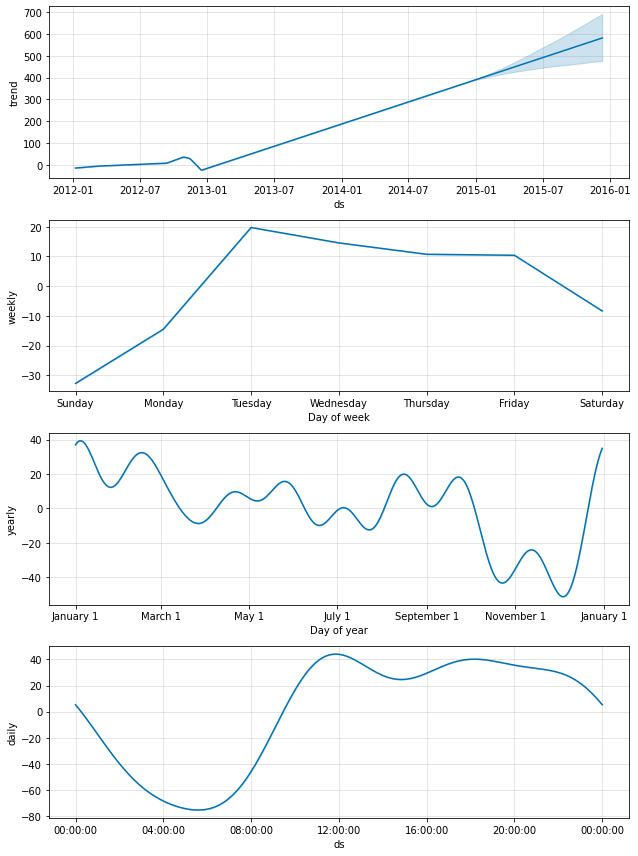

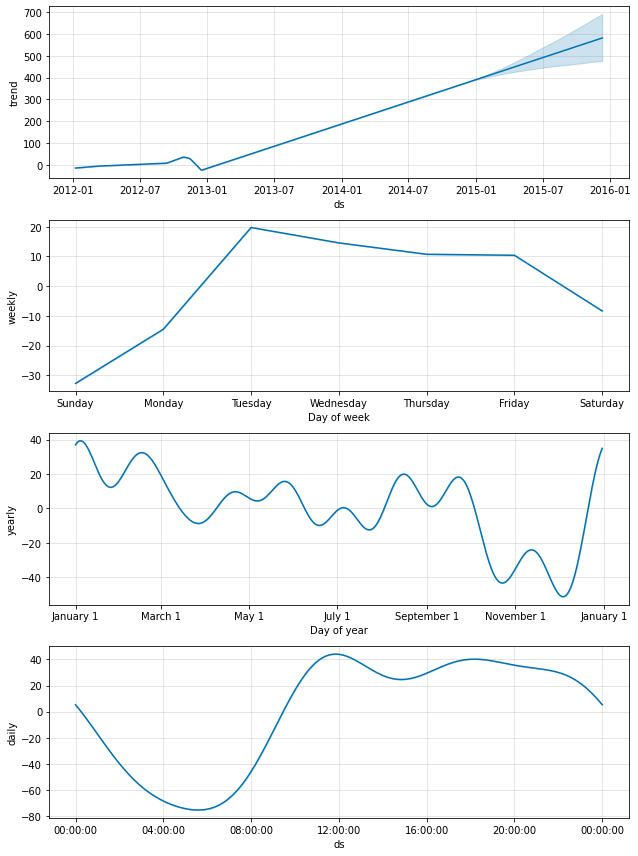

In [ ]:
model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model,horizon="200 days")

INFO:fbprophet:Making 3 forecasts with cutoffs between 2013-11-04 23:00:00 and 2014-05-23 23:00:00


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv,metrics=['rmse'])
df_performance.head()

,horizon,rmse
0,16 days 22:00:00,91.691940
1,16 days 23:00:00,91.926920
2,17 days 00:00:00,92.037010
3,17 days 01:00:00,92.038243
4,17 days 02:00:00,92.081348


In [ ]:
test.head()

,ID,Datetime
0,18288,2014-09-26 00:00:00
1,18289,2014-09-26 01:00:00
2,18290,2014-09-26 02:00:00
3,18291,2014-09-26 03:00:00
4,18292,2014-09-26 04:00:00


In [ ]:
valueids=test['ID'].values

In [ ]:
test=test.drop('ID', axis=1)
test.columns=["ds"]

KeyError: ignored

In [ ]:
test.head()

,ds
0,2014-09-26 00:00:00
1,2014-09-26 01:00:00
2,2014-09-26 02:00:00
3,2014-09-26 03:00:00
4,2014-09-26 04:00:00


In [ ]:
prediction_test=model.predict(test)

In [ ]:
prediction_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          5112 non-null   datetime64[ns]
 1   trend                       5112 non-null   float64       
 2   yhat_lower                  5112 non-null   float64       
 3   yhat_upper                  5112 non-null   float64       
 4   trend_lower                 5112 non-null   float64       
 5   trend_upper                 5112 non-null   float64       
 6   additive_terms              5112 non-null   float64       
 7   additive_terms_lower        5112 non-null   float64       
 8   additive_terms_upper        5112 non-null   float64       
 9   daily                       5112 non-null   float64       
 10  daily_lower                 5112 non-null   float64       
 11  daily_upper                 5112 non-null   float64     

In [ ]:
sampledf=pd.DataFrame(prediction_test, columns=['yhat'])
sampledf['ID']=valueids

In [ ]:
sampledf.to_csv('sampledf.csv', index=False)

In [ ]:
sampledf.isnull().sum()

yhat    0
ID      0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      18288 non-null  datetime64[ns]
 1   y       18288 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 285.9 KB


In [ ]:
#########################################################

In [ ]:
train.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [ ]:
train.set_index('Datetime',inplace=True)

In [ ]:
train=train.drop('ID',axis=1)

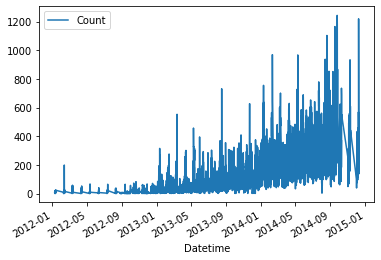

In [ ]:
train.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(train['Count'])

In [ ]:
def adfuller_test(inpdata):
    result=adfuller(inpdata)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(train['Count'])

ADF Test Statistic : -4.456560536856819
p-value : 0.00023540466467665785
#Lags Used : 45
Number of Observations Used : 18242
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


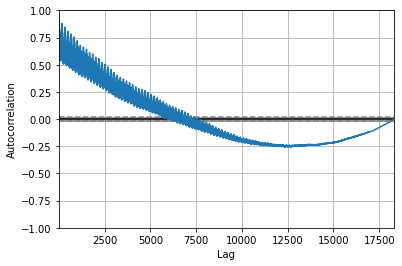

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['Count'])
plt.show()